## Preliminary Cleaning
Any records contaning <= zero statement balance and a marked as late payment status were considered erroneous and deleted.

Total records reduced from 30,000 to 27,963

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab
%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Read Data Set using Pandas

In [2]:
credit = pd.read_csv('default of credit card clients.csv')

In [3]:
# Check the first 5 rows of the data frame
credit.head()

,ID,limit,sex,education,marriage,age,RepayStatSep2005,RepayStatAug2005,RepayStatJul2005,RepayStatJun2005,...,AmtBillStmtJun2005,AmtBillStmtMay2005,AmtBillStmtApr2005,AmtPrevPaySep2005,AmtPrevPayAug2005,AmtPrevPayJul2005,AmtPrevPayJun2005,AmtPrevPayMay2005,AmtPrevPayApr2005,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Column names
credit.columns

Index(['ID', 'limit', 'sex', 'education', 'marriage', 'age',
       'RepayStatSep2005', 'RepayStatAug2005', 'RepayStatJul2005',
       'RepayStatJun2005', 'RepayStatMay2005', 'RepayStatApr2005',
       'AmtBillStmtSep2005', 'AmtBillStmtAug2005', 'AmtBillStmtJul2005',
       'AmtBillStmtJun2005', 'AmtBillStmtMay2005', 'AmtBillStmtApr2005',
       'AmtPrevPaySep2005', 'AmtPrevPayAug2005', 'AmtPrevPayJul2005',
       'AmtPrevPayJun2005', 'AmtPrevPayMay2005', 'AmtPrevPayApr2005',
       'default'],
      dtype='object')

In [5]:
# Information about the data set
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27963 entries, 0 to 27962
Data columns (total 25 columns):
ID                    27963 non-null int64
limit                 27963 non-null int64
sex                   27963 non-null int64
education             27963 non-null int64
marriage              27963 non-null int64
age                   27963 non-null int64
RepayStatSep2005      27963 non-null int64
RepayStatAug2005      27963 non-null int64
RepayStatJul2005      27963 non-null int64
RepayStatJun2005      27963 non-null int64
RepayStatMay2005      27963 non-null int64
RepayStatApr2005      27963 non-null int64
AmtBillStmtSep2005    27963 non-null int64
AmtBillStmtAug2005    27963 non-null int64
AmtBillStmtJul2005    27963 non-null int64
AmtBillStmtJun2005    27963 non-null int64
AmtBillStmtMay2005    27963 non-null int64
AmtBillStmtApr2005    27963 non-null int64
AmtPrevPaySep2005     27963 non-null int64
AmtPrevPayAug2005     27963 non-null int64
AmtPrevPayJul2005     27963 non

## Default Analysis

In [6]:
# Number of default payments
# 0 - No
# 1 - Yes
credit.groupby('default')['default'].count()

default
0    21936
1     6027
Name: default, dtype: int64

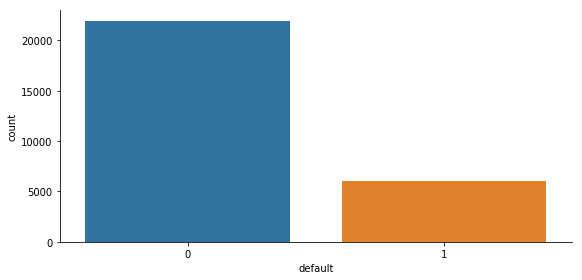

In [7]:
# Plot the number of default payments
sns.factorplot('default', data=credit, kind='count', aspect=2)

## Age Analysis

In [8]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(credit.age.mean(), credit.age.median()))

Average and median age of customers are 35 and 34 years old, respectively


In [9]:
credit.age.describe()

count    27963.000000
mean        35.433716
std          9.213961
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

In [125]:
credit.to_csv('limitdata.csv')

Text(0.5,1,"Distribution of Customers' Ages")

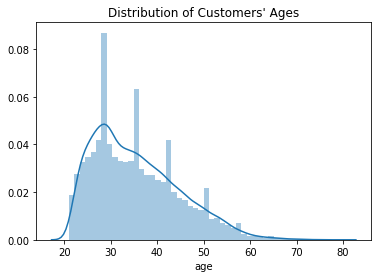

In [78]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(credit.age)
age_dist.set_title("Distribution of Customers' Ages")

In [11]:
#Create Age Bins
bins = [18,24,34,44,54,80]

In [12]:
groupNames = ['18-24','25-34','35-44','45-54','55+']

In [13]:
credit['AgeBracket'] = pd.cut(credit['age'], bins, labels = groupNames)

In [14]:
# Number of customers in each age bracket
credit.groupby('AgeBracket')['AgeBracket'].count()

AgeBracket
18-24     2564
25-34    12115
35-44     8381
45-54     3938
55+        965
Name: AgeBracket, dtype: int64

In [120]:
#Create limit Bins
bins = [0,49999,99999,149999,199999,299999,399999,499999,1000000]

In [121]:
groupNames = ['0-50k','50k-100k','100k-150k','150k-200k','200k-300k','300k-400k','400k-500k','500k+']

In [122]:
credit['LimitBracket'] = pd.cut(credit['limit'], bins, labels = groupNames)

In [123]:
credit.groupby('LimitBracket')['LimitBracket'].count()

LimitBracket
0-50k        4105
50k-100k     6818
100k-150k    3570
150k-200k    3248
200k-300k    5512
300k-400k    2744
400k-500k    1083
500k+         883
Name: LimitBracket, dtype: int64

In [124]:
# Number of customers in each age bracket
credit.groupby('LimitBracket').default.mean()

LimitBracket
0-50k        0.359805
50k-100k     0.258287
100k-150k    0.230812
150k-200k    0.170874
200k-300k    0.151669
300k-400k    0.128644
400k-500k    0.121884
500k+        0.100793
Name: default, dtype: float64

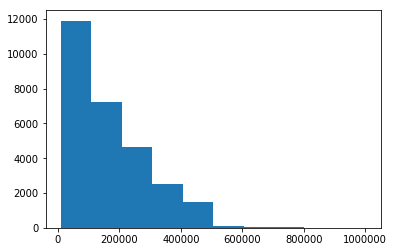

In [71]:
plt.hist(credit['limit'])
plt.show()

(array([7.325e+03, 4.572e+03, 3.619e+03, 3.612e+03, 2.641e+03, 1.987e+03,
        1.144e+03, 1.355e+03, 5.340e+02, 9.710e+02, 7.500e+01, 5.000e+01,
        3.700e+01, 1.900e+01, 1.600e+01, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  10000.,   59500.,  109000.,  158500.,  208000.,  257500.,
         307000.,  356500.,  406000.,  455500.,  505000.,  554500.,
         604000.,  653500.,  703000.,  752500.,  802000.,  851500.,
         901000.,  950500., 1000000.]),
 <a list of 20 Patch objects>)

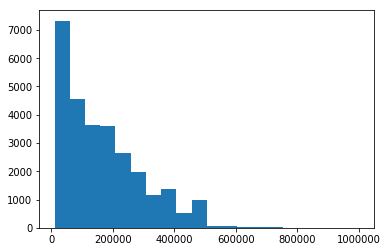

In [76]:
plt.hist(credit['limit'], bins=20)

In [15]:
credit.to_csv('cleandata.csv')

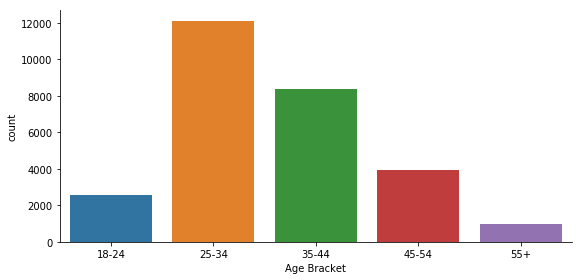

In [16]:
#Plot the count of customers in each age bracket
fg = sns.factorplot('AgeBracket', data=credit, kind='count', aspect=2)
fg.set_xlabels('Age Bracket')

Over 90% of the records are for customers age 21-49

In [17]:
# average limit amount by age group
credit.groupby('AgeBracket').limit.mean()

AgeBracket
18-24     60725.429017
25-34    170066.859265
35-44    192022.154874
45-54    168154.393093
55+      159492.227979
Name: limit, dtype: float64

In [18]:
# % of defaults by age group
credit.groupby('AgeBracket').default.mean()

AgeBracket
18-24    0.270671
25-34    0.197854
35-44    0.212504
45-54    0.233621
55+      0.243523
Name: default, dtype: float64

## Gender Analysis

In [19]:
# Number of customers by gender
# 1 - Male
# 2 - Female
credit.groupby('sex').sex.count()

sex
1    11150
2    16813
Name: sex, dtype: int64

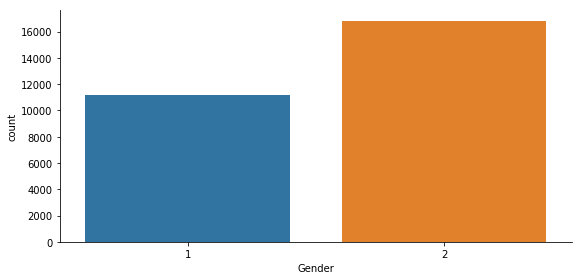

In [20]:
#Plot the count of customers in each age bracket
fg = sns.factorplot('sex', data=credit, kind='count', aspect=2)
fg.set_xlabels('Gender')

The number of females outnumber men nearly 3 to 2.

In [21]:
# average limit amount gender
credit.groupby('sex').limit.mean()

sex
1    161954.590135
2    168661.511925
Name: limit, dtype: float64

In [22]:
# % of defaults by gender
credit.groupby('sex').default.mean()

sex
1    0.234888
2    0.202700
Name: default, dtype: float64

In [23]:
# Number of men and women in each age group
credit.groupby(['sex', 'AgeBracket'])['sex'].count()

sex  AgeBracket
1    18-24          740
     25-34         4631
     35-44         3501
     45-54         1770
     55+            508
2    18-24         1824
     25-34         7484
     35-44         4880
     45-54         2168
     55+            457
Name: sex, dtype: int64

In [126]:
# % of defaults by men and women in each age group
credit.groupby(['AgeBracket'])['default'].mean()

AgeBracket
18-24    0.270671
25-34    0.197854
35-44    0.212504
45-54    0.233621
55+      0.243523
Name: default, dtype: float64

In [25]:
credit.groupby(['sex', 'AgeBracket'])['default'].sum()

sex  AgeBracket
1    18-24          226
     25-34          978
     35-44          842
     45-54          455
     55+            118
2    18-24          468
     25-34         1419
     35-44          939
     45-54          465
     55+            117
Name: default, dtype: int64

Women trend to default in the higher age brackets while mean seem to peak around their 50's.
Should also be noted that the number of records in the higher age brackets is very low compared to the rest of the data set so later trends should not be considered as heavily.

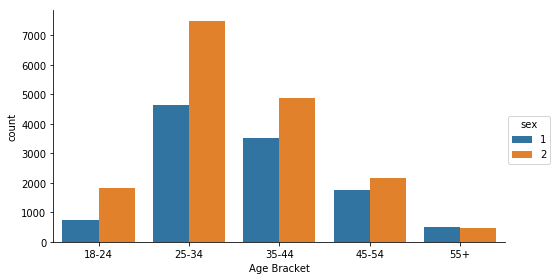

In [26]:
# Group by gender and age group
g = sns.factorplot('AgeBracket', data=credit, hue='sex', kind='count', aspect=1.75)
g.set_xlabels('Age Bracket')

As shown in the figure above the number of female customers is nearly double amount of males in age groups 20 and 30. However that ratio becomes much closer as the age groups increase to 40 and beyond.

In [27]:
# Number of customers who defaulted in each age group by gender.
credit.pivot_table('default', 'sex', 'AgeBracket', aggfunc=np.sum, margins=True)

AgeBracket,18-24,25-34,35-44,45-54,55+,All
sex,,,,,,
1,226,978,842,455,118,2619
2,468,1419,939,465,117,3408
All,694,2397,1781,920,235,6027


In [28]:
non_def = credit[credit['default']==0]

In [29]:
#Total number of customers who did not default
len(non_def)

21936

In [30]:
# Number of customers who did NOT defaulted in each age group by gender
non_def.pivot_table('default', 'sex', 'AgeBracket', aggfunc=len, margins=True)

AgeBracket,18-24,25-34,35-44,45-54,55+,All
sex,,,,,,
1,514,3653,2659,1315,390,8531
2,1356,6065,3941,1703,340,13405
All,1870,9718,6600,3018,730,21936


In [31]:
# Customers who did and did not default by age group and gender
table = pd.crosstab(index=[credit.default,credit.AgeBracket],
                    columns=[credit.sex])
table

sex                    1     2
default AgeBracket            
0       18-24        514  1356
        25-34       3653  6065
        35-44       2659  3941
        45-54       1315  1703
        55+          390   340
1       18-24        226   468
        25-34        978  1419
        35-44        842   939
        45-54        455   465
        55+          118   117

In [32]:
# Alternate table view
table.unstack()

sex            1                            2                       
AgeBracket 18-24 25-34 35-44 45-54  55+ 18-24 25-34 35-44 45-54  55+
default                                                             
0            514  3653  2659  1315  390  1356  6065  3941  1703  340
1            226   978   842   455  118   468  1419   939   465  117

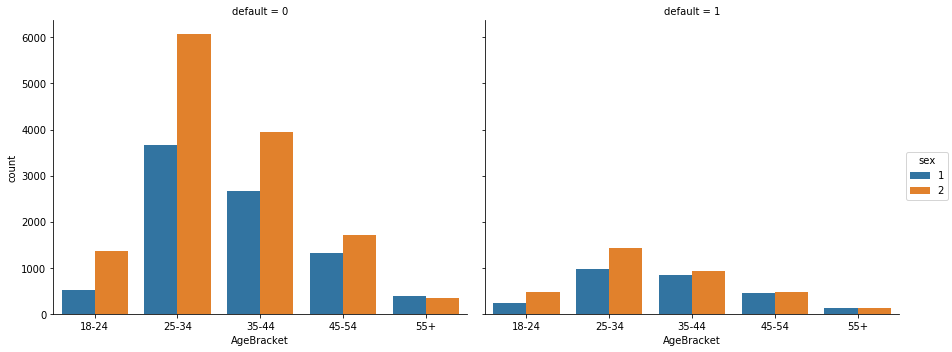

In [33]:
# Do the same as above, but split the customers into either default or not
sns.factorplot('AgeBracket', data=credit, kind='count', hue='sex', 
               col='default', aspect=1.25, size=5)

## Education Analysis

In [34]:
# Number of customers in each education level
#1 - Graduate School
#2 - University
#3 - High School
#4 - Other
credit.groupby('education').education.count()

education
1     9622
2    13270
3     4626
4      445
Name: education, dtype: int64

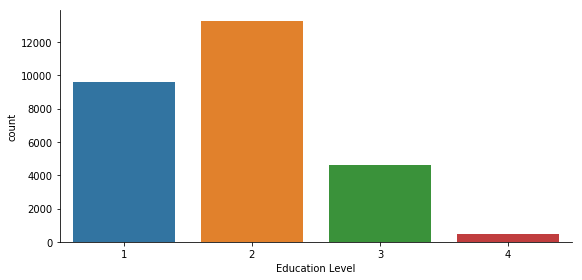

In [35]:
#Plot the count of customers in each education level
fg = sns.factorplot('education', data=credit, kind='count', aspect=2)
fg.set_xlabels('Education Level')

In [36]:
# average limit amount by education level
credit.groupby('education').limit.mean()

education
1    212626.273124
2    145891.936699
3    125276.195417
4    179991.011236
Name: limit, dtype: float64

In [37]:
# % of defaults by education level
credit.groupby('education').default.mean()

education
1    0.181771
2    0.234062
3    0.246217
4    0.074157
Name: default, dtype: float64

In [38]:
# Number of men and women by education level
credit.groupby(['sex', 'education'])['sex'].count()

sex  education
1    1            3986
     2            5116
     3            1884
     4             164
2    1            5636
     2            8154
     3            2742
     4             281
Name: sex, dtype: int64

In [39]:
# % of defaults by gender and education level
credit.groupby(['sex', 'education'])['default'].mean()

sex  education
1    1            0.194180
     2            0.259382
     3            0.267516
     4            0.085366
2    1            0.172995
     2            0.218175
     3            0.231583
     4            0.067616
Name: default, dtype: float64

Top four categories to default by gender and education level are as follows:  
Males High School   - 26.7%   
Males University    - 25.9%  
Females High School - 23.1%  
Females University  - 21.8%  

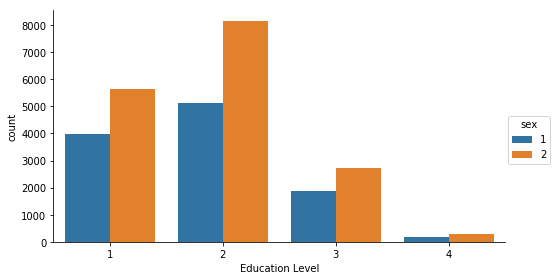

In [40]:
# Group by sex and education level
g = sns.factorplot('education', data=credit, hue='sex', kind='count', aspect=1.75)
g.set_xlabels('Education Level')

Females outnumber males close to 3 to 2 across the board.

In [41]:
# Number of customers who defaulted in each education level by sex.
credit.pivot_table('default', 'sex', 'education', aggfunc=np.sum, margins=True)

education,1,2,3,4,All
sex,,,,,
1,774,1327,504,14,2619
2,975,1779,635,19,3408
All,1749,3106,1139,33,6027


In [42]:
# Number of customers who did NOT default in each education level by sex.
non_def.pivot_table('default', 'sex', 'education', aggfunc=len, margins=True)

education,1,2,3,4,All
sex,,,,,
1,3212,3789,1380,150,8531
2,4661,6375,2107,262,13405
All,7873,10164,3487,412,21936


In [43]:
# Customers who did and did not default by education level and sex
table = pd.crosstab(index=[credit.default,credit.education],
                    columns=[credit.sex])
table

sex                   1     2
default education            
0       1          3212  4661
        2          3789  6375
        3          1380  2107
        4           150   262
1       1           774   975
        2          1327  1779
        3           504   635
        4            14    19

In [44]:
# Alternate table view
table.unstack()

sex           1                      2                 
education     1     2     3    4     1     2     3    4
default                                                
0          3212  3789  1380  150  4661  6375  2107  262
1           774  1327   504   14   975  1779   635   19

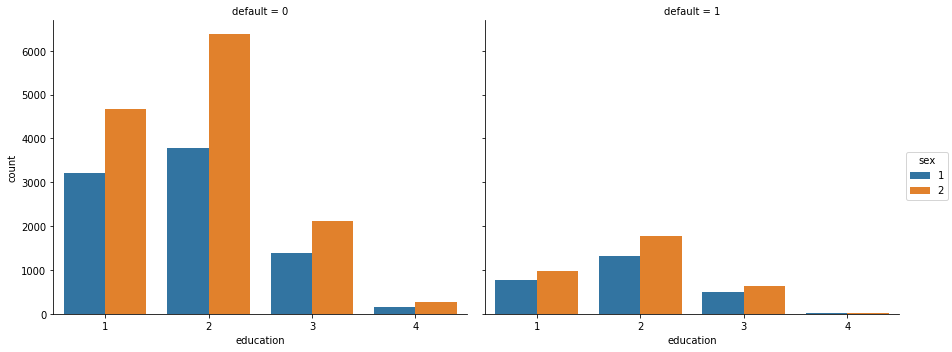

In [45]:
# Do the same as above, but split the customers into either default or not
sns.factorplot('education', data=credit, kind='count', hue='sex', 
               col='default', aspect=1.25, size=5)

In [46]:
# Customers who did and did not default by age group,sex, and education level
table = pd.crosstab(index=[credit.default,credit.education],
                    columns=[credit.sex,credit.AgeBracket])
table

sex                   1                            2                       
AgeBracket        18-24 25-34 35-44 45-54  55+ 18-24 25-34 35-44 45-54  55+
default education                                                          
0       1           116  1589   984   403  120   400  2637  1235   334   55
        2           314  1648  1189   515  123   797  2772  1948   757  101
        3            72   361   438   367  142   136   538   689   565  179
        4            12    55    48    30    5    23   118    69    47    5
1       1            46   324   260   111   33   126   518   242    70   19
        2           141   508   431   204   43   286   752   480   216   45
        3            39   143   146   135   41    53   143   210   176   53
        4             0     3     5     5    1     3     6     7     3    0

In [47]:
# Alternate table view
table.unstack()

sex            1                                               ...     2      \
AgeBracket 18-24              25-34                35-44       ... 35-44       
education      1    2   3   4     1     2    3   4     1     2 ...     3   4   
default                                                        ...             
0            116  314  72  12  1589  1648  361  55   984  1189 ...   689  69   
1             46  141  39   0   324   508  143   3   260   431 ...   210   7   

sex                                              
AgeBracket 45-54               55+               
education      1    2    3   4   1    2    3  4  
default                                          
0            334  757  565  47  55  101  179  5  
1             70  216  176   3  19   45   53  0  

[2 rows x 40 columns]

## Marriage Analysis

In [48]:
# Number of customers by Marital Status
# 1 - Single
# 2 - Married
# 3 - Divorced
# 0 - Other
credit.groupby('marriage').marriage.count()

marriage
0       52
1    12680
2    14930
3      301
Name: marriage, dtype: int64

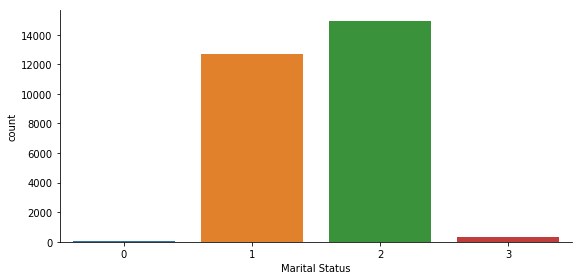

In [49]:
#Plot the count of customers by marital status
fg = sns.factorplot('marriage', data=credit, kind='count', aspect=2)
fg.set_xlabels('Marital Status')

In [50]:
# average limit amount by marital status
credit.groupby('marriage').limit.mean()

marriage
0    130384.615385
1    180243.059937
2    155437.888814
3     94850.498339
Name: limit, dtype: float64

In [51]:
# % of defaults by marital status
credit.groupby('marriage').default.mean()

marriage
0    0.096154
1    0.228864
2    0.203818
3    0.255814
Name: default, dtype: float64

In [52]:
# Number of men and women by marital status
credit.groupby(['sex', 'marriage'])['sex'].count()

sex  marriage
1    0             14
     1           4853
     2           6158
     3            125
2    0             38
     1           7827
     2           8772
     3            176
Name: sex, dtype: int64

In [53]:
# % of defaults by gender and marital status
credit.groupby(['sex', 'marriage'])['default'].mean()

sex  marriage
1    0           0.142857
     1           0.250155
     2           0.221988
     3           0.288000
2    0           0.078947
     1           0.215664
     2           0.191062
     3           0.232955
Name: default, dtype: float64

Top four categories by gender and marital status to defualt are as follows:  
Males divorced - 28.8%  
Males single - 25%  
Females divorced - 23.2%  
Males married - 22.1%

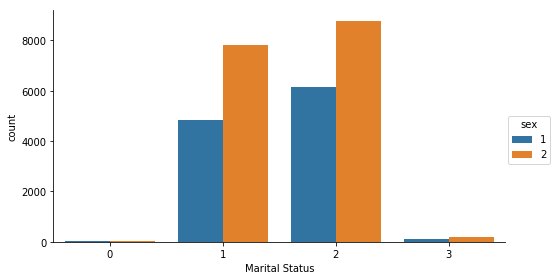

In [54]:
# Group by sex and marital status
g = sns.factorplot('marriage', data=credit, hue='sex', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

In [55]:
# Number of customers who defaulted in each marital status by sex.
credit.pivot_table('default', 'sex', 'marriage', aggfunc=np.sum, margins=True)

marriage,0,1,2,3,All
sex,,,,,
1,2,1214,1367,36,2619
2,3,1688,1676,41,3408
All,5,2902,3043,77,6027


In [56]:
# Number of customers who did NOT default in each marital status by sex.
non_def.pivot_table('default', 'sex', 'marriage', aggfunc=len, margins=True)

marriage,0,1,2,3,All
sex,,,,,
1,12,3639,4791,89,8531
2,35,6139,7096,135,13405
All,47,9778,11887,224,21936


In [57]:
# Customers who did and did not default by marital status and sex
table = pd.crosstab(index=[credit.default,credit.marriage],
                    columns=[credit.sex])
table

sex                  1     2
default marriage            
0       0           12    35
        1         3639  6139
        2         4791  7096
        3           89   135
1       0            2     3
        1         1214  1688
        2         1367  1676
        3           36    41

In [58]:
# Alternate table view
table.unstack()

sex        1                   2                 
marriage   0     1     2   3   0     1     2    3
default                                          
0         12  3639  4791  89  35  6139  7096  135
1          2  1214  1367  36   3  1688  1676   41

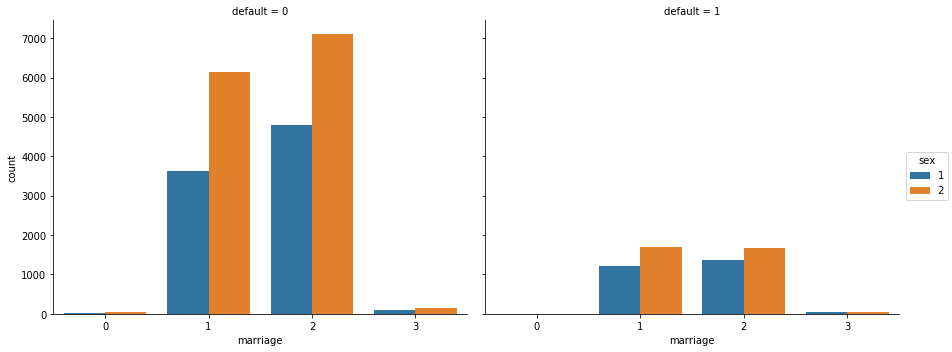

In [59]:
# Do the same as above, but split the customers into either default or not
sns.factorplot('marriage', data=credit, kind='count', hue='sex', 
               col='default', aspect=1.25, size=5)

In [60]:
# Customers who did and did not default by age group,sex, and marital status
table = pd.crosstab(index=[credit.default,credit.marriage],
                    columns=[credit.sex,credit.AgeBracket])
table

sex                  1                            2                       
AgeBracket       18-24 25-34 35-44 45-54  55+ 18-24 25-34 35-44 45-54  55+
default marriage                                                          
0       0            0     2     6     4    0     3    12     9     9    2
        1           21   708  1641   972  297   164  1846  2665  1207  257
        2          491  2929   982   309   80  1184  4185  1216   441   70
        3            2    14    30    30   13     5    22    51    46   11
1       0            0     2     0     0    0     0     0     3     0    0
        1           15   230   518   354   97    69   520   658   350   91
        2          210   742   312    86   17   397   891   267   101   20
        3            1     4    12    15    4     2     8    11    14    6

In [61]:
# Alternate table view
table.unstack()

sex            1                                              ...     2      \
AgeBracket 18-24             25-34                35-44       ... 35-44       
marriage       0   1    2  3     0    1     2   3     0     1 ...     2   3   
default                                                       ...             
0              0  21  491  2     2  708  2929  14     6  1641 ...  1216  51   
1              0  15  210  1     2  230   742   4     0   518 ...   267  11   

sex                                               
AgeBracket 45-54                55+               
marriage       0     1    2   3   0    1   2   3  
default                                           
0              9  1207  441  46   2  257  70  11  
1              0   350  101  14   0   91  20   6  

[2 rows x 40 columns]

## Additional Analysis

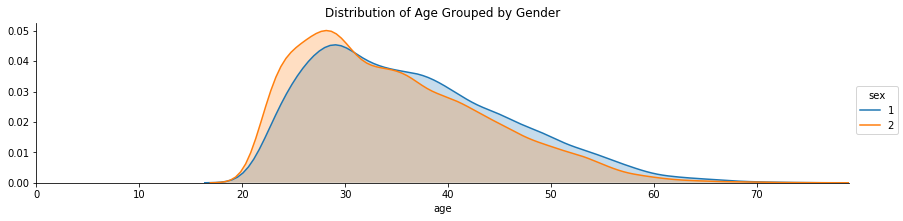

In [62]:
#Distribution of age by gender
fig = sns.FacetGrid(credit, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

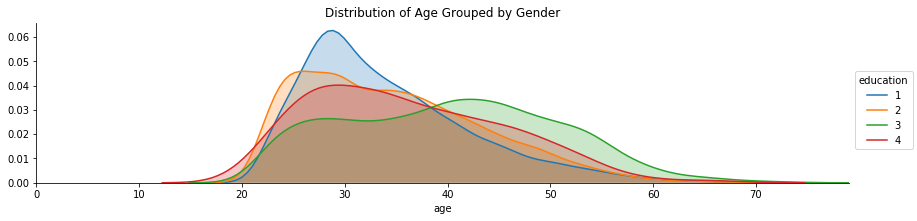

In [63]:
#Distribution of age by education level
fig = sns.FacetGrid(credit, hue='education', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

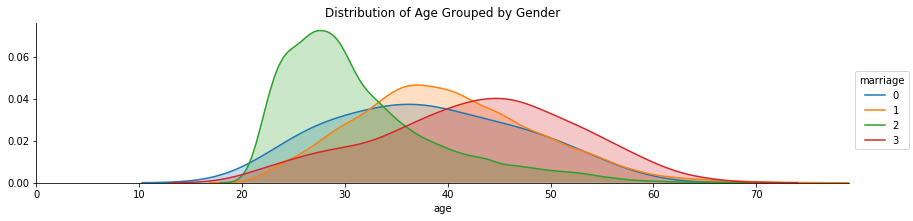

In [64]:
#Distribution of age by marital status
fig = sns.FacetGrid(credit, hue='marriage', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

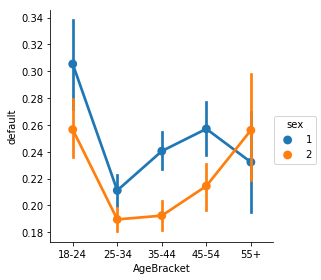

In [65]:
# Default rate by gender along age groups
sns.factorplot('AgeBracket','default', hue='sex', data=credit)

Males tend to have a higher defualt rate than females across most age groups. Higher age groups have limited records where females do actually show hight default rates though. 

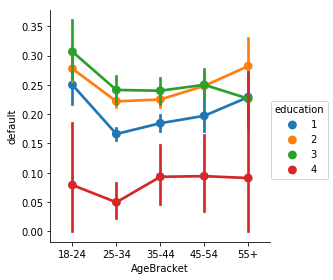

In [66]:
# Default rate by education level along age groupsr
sns.factorplot('AgeBracket','default', hue='education', data=credit)

University and Highschool have the highest rates of default. Followed by graduate school then other with the lowest rate. 

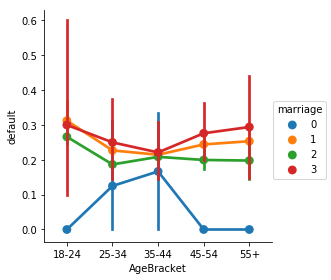

In [67]:
# Default rate by marital status along age groups
sns.factorplot('AgeBracket','default', hue='marriage', data=credit)

Singles have a higher rate of default that married across the board. Divored is the highest and other is the lowest, but both are sporadic due to limited number of records

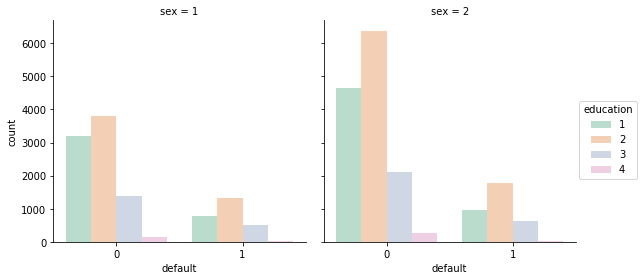

In [68]:
sns.factorplot('default', data=credit, hue='education', kind='count', palette='Pastel2', hue_order=range(1,5),
              col='sex')

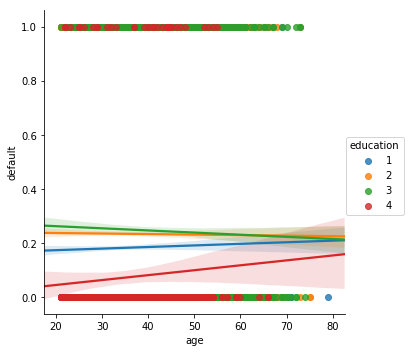

In [69]:
# Linear plot of age vs. default
sns.lmplot('age', 'default', data=credit, hue='education')

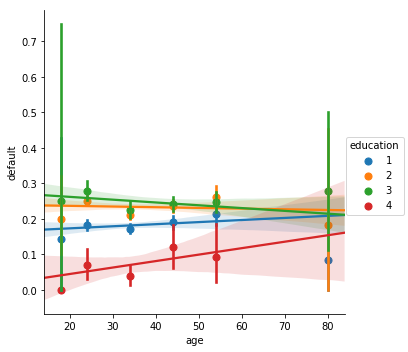

In [70]:
sns.lmplot('age','default',hue='education',data=credit,x_bins=bins, hue_order=[1,2,3,4])

## Summary

Key takeaways  

• 90% of the data set is comprised of customers in their 20's - 40's. Any trends that happen in the 50's and beyond should not be weighted as heavily or we could possibly re arrange our age bins to get a more equal distribution.  
• Women outnumber men 3 to 2 overall  
• Men default at a higher rate than women  
• Default rates of Education level - Highschool ~ Universtiy > Graduate school  
• Default rates of Marital status - divorced > singles > married  

Future recommendations

We definitely have a good feel for the data set now and have spotted some obvious patterns. Now we can move forward with confidence building models to look for improved predictions for our Y variable. If anything comes back out of our expectations we can look back at our data analysis to see what we might have missed.